In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
df_train = pd.read_csv("Cleaned_Train.csv")
df_test = pd.read_csv("Cleaned_Test.csv")

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Cross-validation accuracy scores: [0.7972028  0.76223776 0.80985915 0.78169014 0.82394366]
Mean accuracy: 0.7949867034374077

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       105
         1.0       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



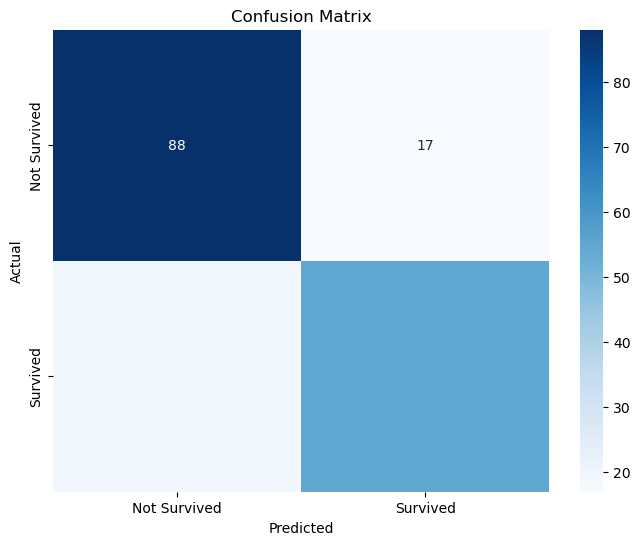

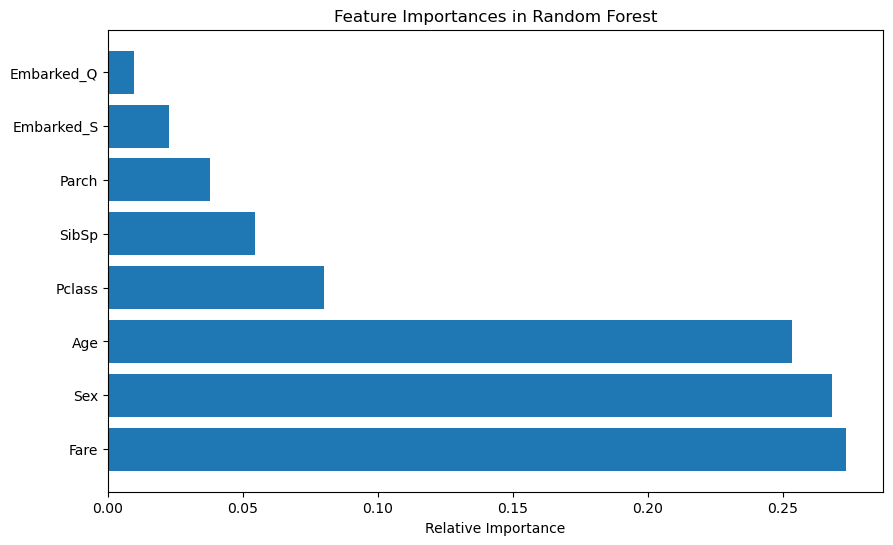

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(df_train.isnull().sum())

# Encode categorical features ('Sex' and 'Embarked')
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

X = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df_train['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Random Forest with default parameters
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation to evaluate the model's performance
cross_val_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean accuracy: {cross_val_scores.mean()}")

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_val_scaled)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [13]:
example_2 = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],  # Female
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [100],
    'Embarked_Q': [0],  # Embarked at 'S'
    'Embarked_S': [1]   # Embarked at 'S'
})
example_2_scaled = scaler.transform(example_2)
prediction_2 = rf.predict(example_2_scaled)
print("Prediction for Example 2 (Female, 1st Class, Age 25): ", "Survived" if prediction_2[0] == 1 else "Not Survived")

Prediction for Example 2 (Female, 1st Class, Age 25):  Survived


In [14]:
example_3 = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],  # Male
    'Age': [45],
    'SibSp': [3],
    'Parch': [2],
    'Fare': [15],
    'Embarked_Q': [1],  # Embarked at 'Q'
    'Embarked_S': [0]   # Not Embarked at 'S'
})
example_3_scaled = scaler.transform(example_3)
prediction_3 = rf.predict(example_3_scaled)
print("Prediction for Example 3 (Male, 3rd Class, Age 45): ", "Survived" if prediction_3[0] == 1 else "Not Survived")

Prediction for Example 3 (Male, 3rd Class, Age 45):  Not Survived
